In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
data_path = os.path.join(os.getcwd(), 'data')

datasets = []

for file in os.listdir(data_path):
    key = os.path.splitext(file)[0]
    globals()[key] = pd.read_csv(os.path.join(data_path, file))
    datasets.append(globals()[key])

# Datasets' first impression

## `results`

In [4]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


In [5]:
for col in results.columns:
    missing_values = (results[col] == '\\N').sum()
    print(f'{col}: {missing_values}')

resultId: 0
raceId: 0
driverId: 0
constructorId: 0
number: 6
grid: 0
position: 10873
positionText: 0
positionOrder: 0
points: 0
laps: 0
time: 18829
milliseconds: 18830
fastestLap: 18465
rank: 18249
fastestLapTime: 18465
fastestLapSpeed: 18465
statusId: 0


- Maintain Id columns to merge than remove them
- `number` not necessary (idea: transform to binary previousChampion based on if the number is 1)
- in `grid` value 0 means started from pitlane (?)
- `position` and `positionText` show the same information, and `positionOrder` has a slightly difference (idea: two variables - `positionOrder` & binary about the retirements)
- `time` and `milliseconds` show the same information
- `rank`, `fastestLapTime` & `fastestLapSpeed` show the same information

## `driver_standings`

In [6]:
driver_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34119,72183,1110,846,69.0,8,8,0
34120,72184,1110,839,35.0,10,10,0
34121,72185,1110,844,99.0,5,5,0
34122,72186,1110,857,34.0,11,11,0


- `position` and `positionText` have the same information

## `constructor_results`

In [7]:
constructor_results

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12285,16785,1110,214,10.0,\N
12286,16786,1110,213,1.0,\N
12287,16787,1110,51,0.0,\N
12288,16788,1110,3,0.0,\N


In [8]:
constructor_results[~(constructor_results['status'] == '\\N')]

,constructorResultsId,raceId,constructorId,points,status
185,186,36,1,14.0,D
195,196,37,1,18.0,D
207,208,38,1,12.0,D
218,219,39,1,14.0,D
228,229,40,1,18.0,D
239,240,41,1,12.0,D
250,251,42,1,18.0,D
262,263,43,1,8.0,D
273,274,44,1,14.0,D
283,284,45,1,10.0,D


In [9]:
for col in constructor_results.columns:
    missing_values = (constructor_results[col] == '\\N').sum()
    print(f'{col}: {missing_values}')

constructorResultsId: 0
raceId: 0
constructorId: 0
points: 0
status: 12273


- `status` is almost only missing values

## `constructor_standings`

In [10]:
constructor_standings

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
13046,28568,1110,214,57.0,6,6,0
13047,28569,1110,3,11.0,7,7,0
13048,28570,1110,213,3.0,10,10,0
13049,28571,1110,210,11.0,8,8,0


- `position` and `positionText` have the same information

## `races`

In [11]:
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


- `name` not necessary
- extract month from `date` (day probably not necessary)
- `time` in +12 GMT do not say very much (idea: try to transform it into local time)
- last group of variables have to be evaluated

## `circuits`

In [12]:
circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


- `circuitRef` probably better than `name`
- `circuitRef` is very similar with `location`

## `drivers`

In [13]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


- `driverRef` better than `code`, `forename` and `surname`
- `number` not necessary
- `dob` convert it into the age of the driver in the day of the race

## `constructors`

In [14]:
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


- `constructorRef` better than `name`

## `status`

In [15]:
status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray


## `qualifying`

In [16]:
qualifying

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9810,9868,1110,848,3,23,16,2:00.314,\N,\N
9811,9869,1110,855,51,24,17,2:00.832,\N,\N
9812,9870,1110,858,3,2,18,2:01.535,\N,\N
9813,9871,1110,817,213,3,19,2:02.159,\N,\N


- `number` not necessary
- there are obviously many missing values in `q2` and `q3` idea

## `lap_times`

In [17]:
lap_times

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
551737,1110,817,40,17,1:54.361,114361
551738,1110,817,41,17,1:53.367,113367
551739,1110,817,42,16,1:55.247,115247
551740,1110,817,43,16,1:52.115,112115


In [18]:
lap_times_2 = pd.merge(lap_times, races, on='raceId', how='left')
lap_times_3 = pd.merge(lap_times_2, drivers, on='driverId', how='left')
lap_times_4 = pd.merge(lap_times_3, circuits, on='circuitId', how='left')
lap_times_table = lap_times_4[['lap', 'position', 'milliseconds', 'year', 'driverRef', 'circuitRef']]

## `pit_stops`

In [19]:
pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
10084,1110,4,2,29,15:59:01,23.798,23798
10085,1110,830,2,30,16:00:16,23.012,23012
10086,1110,848,3,33,16:07:06,23.529,23529
10087,1110,858,3,34,16:09:09,23.109,23109


## `sprint_results`

In [20]:
sprint_results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16,16,16,0,11,+37.571,1536004,6,2:03.482,1
176,177,1110,807,210,27,20,17,17,17,0,11,+37.827,1536260,6,2:03.472,1
177,178,1110,852,213,22,16,18,18,18,0,11,+39.267,1537700,7,2:02.080,1
178,179,1110,815,9,11,8,\N,R,19,0,8,\N,\N,2,2:02.516,130


# Merging

In [21]:
merged_data = pd.merge(results, races, on='raceId')
merged_data2 = pd.merge(merged_data, drivers, on='driverId')
merged_data3 = pd.merge(merged_data2, constructors, on='constructorId')
merged_data4 = pd.merge(merged_data3, status, on='statusId')
merged_data5 = pd.merge(merged_data4, circuits, on='circuitId')

C:\Users\Afonso Cadete\AppData\Local\Temp\ipykernel_20124\813418794.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'url_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data5 = pd.merge(merged_data4, circuits, on='circuitId')


In [22]:
merged_data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26080 entries, 0 to 26079
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number_x         26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time_x           26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [23]:
merged_data5.drop(columns=merged_data5.filter(regex='Id|number|url|name|fp|quali|sprint').columns, inplace=True)

In [24]:
merged_data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26080 entries, 0 to 26079
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grid             26080 non-null  int64  
 1   position         26080 non-null  object 
 2   positionText     26080 non-null  object 
 3   positionOrder    26080 non-null  int64  
 4   points           26080 non-null  float64
 5   laps             26080 non-null  int64  
 6   time_x           26080 non-null  object 
 7   milliseconds     26080 non-null  object 
 8   fastestLap       26080 non-null  object 
 9   rank             26080 non-null  object 
 10  fastestLapTime   26080 non-null  object 
 11  fastestLapSpeed  26080 non-null  object 
 12  year             26080 non-null  int64  
 13  round            26080 non-null  int64  
 14  date             26080 non-null  object 
 15  time_y           26080 non-null  object 
 16  driverRef        26080 non-null  object 
 17  code        

In [25]:
data2223 = merged_data5[merged_data5['year'].isin([2022, 2023])]

In [26]:
data2223.T

,26,29,30,31,38,39,49,74,134,136,...,25028,25029,25030,25031,25032,25033,25034,25035,25036,25037
grid,7,4,13,16,5,3,6,20,5,1,...,9,17,15,19,20,8,0,7,17,16
position,6,5,6,8,4,2,3,10,12,1,...,12,11,18,19,20,\N,17,\N,\N,16
positionText,6,5,6,8,4,2,3,10,12,1,...,12,11,18,19,20,R,17,R,R,16
positionOrder,6,5,6,8,4,2,3,10,12,1,...,12,11,18,19,20,19,17,18,20,16
points,8.0,10.0,8.0,4.0,12.0,18.0,15.0,1.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
laps,58,58,58,58,58,58,58,58,58,58,...,57,57,57,56,56,39,54,45,6,56
time_x,+53.737,+53.303,+3.701,+5.382,+28.543,+0.179,+25.593,+1:19.382,+6.594,1:27:46.548,...,+40.146,+1:04.309,+1:28.949,\N,\N,\N,\N,\N,\N,\N
milliseconds,5320285,5319851,9162072,9163753,5295091,9158550,5292141,5345930,9164965,5266548,...,5704404,5322550,5347190,\N,\N,\N,\N,\N,\N,\N
fastestLap,54,55,46,53,51,49,53,54,53,58,...,55,56,57,56,50,37,50,38,4,52
rank,9,8,9,12,7,5,4,12,3,1,...,8,8,12,18,19,14,16,19,20,17


In [27]:
data2223.drop(columns=['position', 'positionText', 'code', 'time_x'], inplace=True)

C:\Users\Afonso Cadete\AppData\Local\Temp\ipykernel_20124\2186192532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2223.drop(columns=['position', 'positionText', 'code', 'time_x'], inplace=True)


In [28]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 26 to 25037
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grid             680 non-null    int64  
 1   positionOrder    680 non-null    int64  
 2   points           680 non-null    float64
 3   laps             680 non-null    int64  
 4   milliseconds     680 non-null    object 
 5   fastestLap       680 non-null    object 
 6   rank             680 non-null    object 
 7   fastestLapTime   680 non-null    object 
 8   fastestLapSpeed  680 non-null    object 
 9   year             680 non-null    int64  
 10  round            680 non-null    int64  
 11  date             680 non-null    object 
 12  time_y           680 non-null    object 
 13  driverRef        680 non-null    object 
 14  dob              680 non-null    object 
 15  nationality_x    680 non-null    object 
 16  constructorRef   680 non-null    object 
 17  nationality_y

# Missing Values

In [29]:
data2223.replace('\\N', np.nan, inplace=True)

C:\Users\Afonso Cadete\AppData\Local\Temp\ipykernel_20124\1418711449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2223.replace('\\N', np.nan, inplace=True)


In [30]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 26 to 25037
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grid             680 non-null    int64  
 1   positionOrder    680 non-null    int64  
 2   points           680 non-null    float64
 3   laps             680 non-null    int64  
 4   milliseconds     442 non-null    object 
 5   fastestLap       662 non-null    object 
 6   rank             680 non-null    object 
 7   fastestLapTime   662 non-null    object 
 8   fastestLapSpeed  662 non-null    object 
 9   year             680 non-null    int64  
 10  round            680 non-null    int64  
 11  date             680 non-null    object 
 12  time_y           680 non-null    object 
 13  driverRef        680 non-null    object 
 14  dob              680 non-null    object 
 15  nationality_x    680 non-null    object 
 16  constructorRef   680 non-null    object 
 17  nationality_y

In [31]:
def convert_to_float(var):
    try:
        return float(var)
    except (ValueError, TypeError):
        return var  # Return the variable itself if it can't be converted


for col in data2223.columns:
    data2223[col] = data2223[col].apply(convert_to_float)

C:\Users\Afonso Cadete\AppData\Local\Temp\ipykernel_20124\3242431996.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2223[col] = data2223[col].apply(convert_to_float)


In [32]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 26 to 25037
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grid             680 non-null    float64
 1   positionOrder    680 non-null    float64
 2   points           680 non-null    float64
 3   laps             680 non-null    float64
 4   milliseconds     442 non-null    float64
 5   fastestLap       662 non-null    float64
 6   rank             680 non-null    float64
 7   fastestLapTime   662 non-null    object 
 8   fastestLapSpeed  662 non-null    float64
 9   year             680 non-null    float64
 10  round            680 non-null    float64
 11  date             680 non-null    object 
 12  time_y           680 non-null    object 
 13  driverRef        680 non-null    object 
 14  dob              680 non-null    object 
 15  nationality_x    680 non-null    object 
 16  constructorRef   680 non-null    object 
 17  nationality_y

## `alt`

In [33]:
data2223['alt'].fillna(7, inplace=True)
# https://www.freemaptools.com/elevation-finder.htm

C:\Users\Afonso Cadete\AppData\Local\Temp\ipykernel_20124\256530716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2223['alt'].fillna(7, inplace=True)


## `fastestLap`, `fastestLapTime` & `lastestLapSpeed`

In [34]:
def convert_to_milliseconds(time_str):
    if pd.isnull(time_str):  # Check for 'nan'
        return np.nan  # Return 'nan' value
    
    minutes, seconds = map(float, str(time_str).split(':'))
    total_seconds = (minutes * 60) + seconds
    milliseconds = total_seconds * 1000
    return milliseconds

data2223['fastestLapTime'] = data2223['fastestLapTime'].apply(convert_to_milliseconds)

C:\Users\Afonso Cadete\AppData\Local\Temp\ipykernel_20124\330954300.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2223['fastestLapTime'] = data2223['fastestLapTime'].apply(convert_to_milliseconds)


In [35]:
lap_times_table

,lap,position,milliseconds,year,driverRef,circuitRef
0,1,1,98109,2011,vettel,albert_park
1,2,1,93006,2011,vettel,albert_park
2,3,1,92713,2011,vettel,albert_park
3,4,1,92803,2011,vettel,albert_park
4,5,1,92342,2011,vettel,albert_park
...,...,...,...,...,...,...
551737,40,17,114361,2023,ricciardo,spa
551738,41,17,113367,2023,ricciardo,spa
551739,42,16,115247,2023,ricciardo,spa
551740,43,16,112115,2023,ricciardo,spa


In [36]:
fastestLapTimeMissing = pd.merge(lap_times_table,
                                 data2223[(data2223['fastestLap'].isna()) & (data2223['laps'] != 0)][
                                     ['year', 'driverRef', 'circuitRef']],
                                 on=['year', 'driverRef', 'circuitRef'])

fastestLapTimeMissing = fastestLapTimeMissing.groupby(['year', 'driverRef', 'circuitRef']).max()

In [37]:
data2223 = pd.merge(data2223, fastestLapTimeMissing, 
                    on=['year', 'driverRef', 'circuitRef'], how='left')

data2223['fastestLap'].fillna(data2223['lap'], inplace=True)
data2223['fastestLapTime'].fillna(data2223['milliseconds_y'], inplace=True)

data2223.drop(['lap', 'position', 'milliseconds_y'], axis=1, inplace=True)

In [38]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 679
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grid             680 non-null    float64
 1   positionOrder    680 non-null    float64
 2   points           680 non-null    float64
 3   laps             680 non-null    float64
 4   milliseconds_x   442 non-null    float64
 5   fastestLap       667 non-null    float64
 6   rank             680 non-null    float64
 7   fastestLapTime   667 non-null    float64
 8   fastestLapSpeed  662 non-null    float64
 9   year             680 non-null    float64
 10  round            680 non-null    float64
 11  date             680 non-null    object 
 12  time_y           680 non-null    object 
 13  driverRef        680 non-null    object 
 14  dob              680 non-null    object 
 15  nationality_x    680 non-null    object 
 16  constructorRef   680 non-null    object 
 17  nationality_y   

In [39]:
slowestLapSpeed = data2223.groupby('date')['fastestLapSpeed'].min()
fastestLapSpeedStd = data2223.groupby('date')['fastestLapSpeed'].std()

In [40]:
data2223 = pd.merge(data2223, slowestLapSpeed, on='date', how='left')
data2223 = pd.merge(data2223, fastestLapSpeedStd, on='date', how='left')

In [41]:
data2223['fastestLapSpeedToImpute'] = data2223['fastestLapSpeed_y'] - round(data2223['fastestLapSpeed'], 3)
data2223['fastestLapSpeed_x'].fillna(data2223['fastestLapSpeedToImpute'], inplace=True)
data2223.drop(['fastestLapSpeed_y', 'fastestLapSpeed', 'fastestLapSpeedToImpute'], axis=1, inplace=True)

In [42]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 679
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   grid               680 non-null    float64
 1   positionOrder      680 non-null    float64
 2   points             680 non-null    float64
 3   laps               680 non-null    float64
 4   milliseconds_x     442 non-null    float64
 5   fastestLap         667 non-null    float64
 6   rank               680 non-null    float64
 7   fastestLapTime     667 non-null    float64
 8   fastestLapSpeed_x  680 non-null    float64
 9   year               680 non-null    float64
 10  round              680 non-null    float64
 11  date               680 non-null    object 
 12  time_y             680 non-null    object 
 13  driverRef          680 non-null    object 
 14  dob                680 non-null    object 
 15  nationality_x      680 non-null    object 
 16  constructorRef     680 non

In [43]:
lap_times_table[lap_times_table['lap'] == 1].groupby(['year', 'circuitRef'])['milliseconds'].max()

year  circuitRef    
1996  albert_park       116926
      catalunya         264604
      estoril           266095
      galvez            111788
      hockenheimring    124895
                         ...  
2023  monaco            120092
      red_bull_ring     106390
      silverstone       105771
      spa               124175
      villeneuve        109276
Name: milliseconds, Length: 506, dtype: int64

In [45]:
data2223 = pd.merge(data2223, lap_times_table[lap_times_table['lap'] == 1].groupby(['year', 'circuitRef'])['milliseconds'].max(),
                    on=['year', 'circuitRef'], how='left')

In [48]:
data2223['fastestLapTime'].fillna(data2223['milliseconds'], inplace=True)
data2223['fastestLap'].fillna(1, inplace=True)
data2223.drop('milliseconds', axis=1, inplace=True)

## `milliseconds`

In [49]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 679
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   grid               680 non-null    float64
 1   positionOrder      680 non-null    float64
 2   points             680 non-null    float64
 3   laps               680 non-null    float64
 4   milliseconds_x     442 non-null    float64
 5   fastestLap         680 non-null    float64
 6   rank               680 non-null    float64
 7   fastestLapTime     680 non-null    float64
 8   fastestLapSpeed_x  680 non-null    float64
 9   year               680 non-null    float64
 10  round              680 non-null    float64
 11  date               680 non-null    object 
 12  time_y             680 non-null    object 
 13  driverRef          680 non-null    object 
 14  dob                680 non-null    object 
 15  nationality_x      680 non-null    object 
 16  constructorRef     680 non

In [50]:
data2223[data2223['status'] != 'Finished']['status'].value_counts()

+1 Lap              124
Collision damage     18
Collision            15
Accident             12
Engine               12
+2 Laps              11
Power Unit            6
Gearbox               4
Hydraulics            4
Brakes                2
Power loss            2
Mechanical            2
Water pressure        2
Oil leak              2
Water leak            2
Undertray             2
Spun off              2
Fuel pressure         2
Differential          1
Water pump            1
Withdrew              1
Cooling system        1
Suspension            1
+6 Laps               1
Turbo                 1
Overheating           1
Vibrations            1
Electrical            1
Retired               1
Fuel pump             1
Fuel leak             1
Front wing            1
Name: status, dtype: int64

In [51]:
data2223[data2223['status'].str.contains('Lap')]

,grid,positionOrder,points,laps,milliseconds_x,fastestLap,rank,fastestLapTime,fastestLapSpeed_x,year,...,nationality_x,constructorRef,nationality_y,status,circuitRef,location,country,lat,lng,alt
24,18.0,16.0,0.0,57.0,NaN,49.0,18.0,83882.0,226.518,2022.0,...,Canadian,williams,British,+1 Lap,albert_park,Melbourne,Australia,-37.8497,144.96800,10.0
25,10.0,17.0,0.0,57.0,NaN,57.0,2.0,80846.0,235.024,2022.0,...,Spanish,alpine,French,+1 Lap,albert_park,Melbourne,Australia,-37.8497,144.96800,10.0
26,16.0,14.0,0.0,57.0,NaN,44.0,15.0,83071.0,228.729,2022.0,...,Danish,haas,American,+1 Lap,albert_park,Melbourne,Australia,-37.8497,144.96800,10.0
27,15.0,13.0,0.0,57.0,NaN,55.0,14.0,83006.0,228.908,2022.0,...,German,haas,American,+1 Lap,albert_park,Melbourne,Australia,-37.8497,144.96800,10.0
28,13.0,15.0,0.0,57.0,NaN,56.0,16.0,83342.0,227.985,2022.0,...,Japanese,alphatauri,Italian,+1 Lap,albert_park,Melbourne,Australia,-37.8497,144.96800,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,20.0,18.0,0.0,71.0,NaN,62.0,18.0,76066.0,201.567,2022.0,...,Canadian,williams,British,+1 Lap,zandvoort,Zandvoort,Netherlands,52.3888,4.54092,6.0
629,13.0,13.0,0.0,49.0,NaN,46.0,16.0,94446.0,235.334,2022.0,...,Canadian,aston_martin,British,+1 Lap,jeddah,Jeddah,Saudi Arabia,21.6319,39.10440,15.0
630,14.0,18.0,0.0,49.0,NaN,37.0,17.0,94384.0,235.489,2023.0,...,Finnish,alfa,Swiss,+1 Lap,jeddah,Jeddah,Saudi Arabia,21.6319,39.10440,15.0
673,19.0,19.0,0.0,56.0,NaN,56.0,18.0,92006.0,211.760,2023.0,...,Australian,mclaren,British,+1 Lap,miami,Miami,USA,25.9581,-80.23890,7.0


In [54]:
lastFinisherTime = data2223.groupby('date')['milliseconds_x'].max()

In [58]:
data2223

,grid,positionOrder,points,laps,milliseconds_x,fastestLap,rank,fastestLapTime,fastestLapSpeed_x,year,...,constructorRef,nationality_y,status,circuitRef,location,country,lat,lng,alt,milliseconds_xLastFinisher
0,7.0,6.0,8.0,58.0,5320285.0,54.0,9.0,82451.0,230.449,2022.0,...,mclaren,British,Finished,albert_park,Melbourne,Australia,-37.8497,144.9680,10.0,5355146.0
1,4.0,5.0,10.0,58.0,5319851.0,55.0,8.0,82248.0,231.018,2022.0,...,mclaren,British,Finished,albert_park,Melbourne,Australia,-37.8497,144.9680,10.0,5355146.0
2,13.0,6.0,8.0,58.0,9162072.0,46.0,9.0,81173.0,234.077,2023.0,...,mclaren,British,Finished,albert_park,Melbourne,Australia,-37.8497,144.9680,10.0,9164965.0
3,16.0,8.0,4.0,58.0,9163753.0,53.0,12.0,81335.0,233.611,2023.0,...,mclaren,British,Finished,albert_park,Melbourne,Australia,-37.8497,144.9680,10.0,9164965.0
4,5.0,4.0,12.0,58.0,5295091.0,51.0,7.0,81886.0,232.039,2022.0,...,mercedes,German,Finished,albert_park,Melbourne,Australia,-37.8497,144.9680,10.0,5355146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,8.0,19.0,0.0,39.0,NaN,37.0,14.0,93411.0,208.575,2022.0,...,mclaren,British,Collision,miami,Miami,USA,25.9581,-80.2389,7.0,5737563.0
676,0.0,17.0,0.0,54.0,NaN,50.0,16.0,93479.0,208.423,2022.0,...,aston_martin,British,Collision,miami,Miami,USA,25.9581,-80.2389,7.0,5737563.0
677,7.0,18.0,0.0,45.0,NaN,38.0,19.0,94487.0,206.199,2022.0,...,alphatauri,Italian,Suspension,miami,Miami,USA,25.9581,-80.2389,7.0,5737563.0
678,17.0,20.0,0.0,6.0,NaN,4.0,20.0,95731.0,203.520,2022.0,...,alfa,Swiss,Water leak,miami,Miami,USA,25.9581,-80.2389,7.0,5737563.0


In [55]:
data2223 = pd.merge(
    data2223,
    lastFinisherTime,
    on=['date'],
    suffixes=('', 'LastFinisher'),
    how='left'
)

In [60]:
def calculate_missing_milliseconds(row):
    if pd.isnull(row['milliseconds_x']):
        laps_missing = 0
        if '+1 Lap' in row['status']:
            laps_missing = 1
        elif '+2 Laps' in row['status']:
            laps_missing = 2
        elif '+6 Laps' in row['status']:
            laps_missing = 6
        elif row['status'] != 'Finished':
            laps_missing = 10
        
        if laps_missing > 0:
            return row['milliseconds_xLastFinisher'] + laps_missing * row['fastestLapTime']
    
    return row['milliseconds_x']

# Apply the function to fill missing milliseconds
data2223['milliseconds_x'] = data2223.apply(calculate_missing_milliseconds, axis=1)
data2223.drop(columns=['milliseconds_xLastFinisher'], inplace=True)

# Feature Transformation/Engineering

Engineering:
- `date` - `dob` ---> `age`
- `laps` / max(`laps`[`circuitRef`]) = `lapsPercentage`

In [62]:
data2223['date'] = pd.to_datetime(data2223['date'])
data2223['dob'] = pd.to_datetime(data2223['dob'])

data2223['month'] = data2223['date'].dt.month

# Calculate age by subtracting 'dob' from 'date'
data2223['age'] = (data2223['date'] - data2223['dob']).dt.days // 365

# Display the DataFrame with the new 'age' variable
data2223[['driverRef', 'dob', 'date', 'age']]

,driverRef,dob,date,age
0,ricciardo,1989-07-01,2022-04-10,32
1,norris,1999-11-13,2022-04-10,22
2,norris,1999-11-13,2023-04-02,23
3,piastri,2001-04-06,2023-04-02,22
4,hamilton,1985-01-07,2022-04-10,37
...,...,...,...,...
675,norris,1999-11-13,2022-05-08,22
676,vettel,1987-07-03,2022-05-08,34
677,gasly,1996-02-07,2022-05-08,26
678,zhou,1999-05-30,2022-05-08,22


In [39]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 679
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   grid             680 non-null    float64       
 1   positionOrder    680 non-null    float64       
 2   points           680 non-null    float64       
 3   laps             680 non-null    float64       
 4   milliseconds     442 non-null    float64       
 5   fastestLap       662 non-null    float64       
 6   rank             680 non-null    float64       
 7   fastestLapTime   662 non-null    float64       
 8   fastestLapSpeed  662 non-null    float64       
 9   year             680 non-null    float64       
 10  round            680 non-null    float64       
 11  date             680 non-null    datetime64[ns]
 12  time_y           680 non-null    datetime64[ns]
 13  driverRef        680 non-null    object        
 14  dob              680 non-null    datetime6

In [63]:
datetime_columns = data2223.select_dtypes(include=['datetime']).columns
data2223.drop(columns=datetime_columns, inplace=True)

In [75]:
data2223.drop(columns='time_y', inplace=True)

In [76]:
data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 679
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   grid               680 non-null    float64
 1   positionOrder      680 non-null    float64
 2   points             680 non-null    float64
 3   laps               680 non-null    float64
 4   milliseconds_x     680 non-null    float64
 5   fastestLap         680 non-null    float64
 6   rank               680 non-null    float64
 7   fastestLapTime     680 non-null    float64
 8   fastestLapSpeed_x  680 non-null    float64
 9   year               680 non-null    float64
 10  round              680 non-null    float64
 11  driverRef          680 non-null    object 
 12  nationality_x      680 non-null    object 
 13  constructorRef     680 non-null    object 
 14  nationality_y      680 non-null    object 
 15  status             680 non-null    object 
 16  circuitRef         680 non

# Data Preparation

In [66]:
# DATA TYPES
def datatype_distinction(data):
    '''
    Distinguishes between the numerical and categorical columns in a DataFrame.

    Parameters:
    -----------
    data : pandas.DataFrame
        The input DataFrame.

    Returns:
    --------
    numerical : pandas.DataFrame
        DataFrame containing only numerical columns.

    categorical : pandas.DataFrame
        DataFrame containing only categorical columns.
    '''
    # Select numerical columns using select_dtypes with np.number
    numerical = data.select_dtypes(include=np.number).copy()
    
    # Select categorical columns by excluding numerical types
    categorical = data.select_dtypes(exclude=np.number).copy()
    
    return numerical, categorical


# DATA TRANSFORMATION
def transformation(technique, data, column_transformer=False):
    '''
    Applies the specified transformation technique to the DataFrame.

    Parameters:
    -----------
    technique : object
        The transformation technique (e.g., from Scikit-learn) to be applied.

    data : pandas.DataFrame
        The input DataFrame to be transformed.

    column_transformer : bool, optional (default=False)
        Flag to indicate if a column transformer is used for custom column names.

    Returns:
    --------
    data_transformed : pandas.DataFrame
        Transformed DataFrame.

    Notes:
    ------
    - If column_transformer is False, the columns in the transformed DataFrame
      will retain the original column names.
    - If column_transformer is True, the method assumes that technique has a
      get_feature_names_out() method and uses it to get feature names for the
      transformed data, otherwise retains the original column names.
    '''
    # Apply the specified transformation technique to the data
    data_transformed = technique.transform(data)
    
    # Create a DataFrame from the transformed data
    data_transformed = pd.DataFrame(
        data_transformed,
        index=data.index,
        columns=technique.get_feature_names_out() if column_transformer else data.columns
    )
    
    return data_transformed


def data_transform(technique, X_train, X_val=None, column_transformer=False):
    '''
    Fits a data transformation technique on the training data and applies the transformation 
    to both the training and validation data.

    Parameters:
    -----------
    technique : object
        The data transformation technique (e.g., from Scikit-learn) to be applied.

    X_train : pandas.DataFrame or array-like
        The training data to fit the transformation technique and transform.

    X_val : pandas.DataFrame or array-like, optional (default=None)
        The validation data to be transformed.

    column_transformer : bool, optional (default=False)
        Flag to indicate if a column transformer is used for custom column names.

    Returns:
    --------
    X_train_transformed : pandas.DataFrame
        Transformed training data.

    X_val_transformed : pandas.DataFrame or None
        Transformed validation data. None if X_val is None.

    Notes:
    ------
    - Fits the transformation technique on the training data (X_train).
    - Applies the fitted transformation to X_train and optionally to X_val if provided.
    '''
    # Fit the transformation technique on the training data
    technique.fit(X_train)
    
    # Apply transformation to the training data
    X_train_transformed = transformation(technique, X_train, column_transformer)
    
    # Apply transformation to the validation data if provided
    X_val_transformed = None
    if X_val is not None:
        X_val_transformed = transformation(technique, X_val, column_transformer)
        
    return X_train_transformed, X_val_transformed

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [77]:
ct = ColumnTransformer([
    ('oneHot', OneHotEncoder(drop='first', sparse=False), [i for i in range(11, 19)])
], remainder='passthrough')

train = data_transform(ct, data2223, column_transformer=True)[0]

c:\Users\Afonso Cadete\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [78]:
train.columns = train.columns.str.replace(r'(oneHot|remainder)__', '')

C:\Users\Afonso Cadete\AppData\Local\Temp\ipykernel_20124\222682236.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train.columns = train.columns.str.replace(r'(oneHot|remainder)__', '')


In [79]:
train

,driverRef_alonso,driverRef_bottas,driverRef_de_vries,driverRef_gasly,driverRef_hamilton,driverRef_hulkenberg,driverRef_kevin_magnussen,driverRef_latifi,driverRef_leclerc,driverRef_max_verstappen,...,rank,fastestLapTime,fastestLapSpeed_x,year,round,lat,lng,alt,month,age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,82451.0,230.449,2022.0,3.0,-37.8497,144.9680,10.0,4.0,32.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,82248.0,231.018,2022.0,3.0,-37.8497,144.9680,10.0,4.0,22.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,81173.0,234.077,2023.0,3.0,-37.8497,144.9680,10.0,4.0,23.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,81335.0,233.611,2023.0,3.0,-37.8497,144.9680,10.0,4.0,22.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,7.0,81886.0,232.039,2022.0,3.0,-37.8497,144.9680,10.0,4.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,93411.0,208.575,2022.0,5.0,25.9581,-80.2389,7.0,5.0,22.0
676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,93479.0,208.423,2022.0,5.0,25.9581,-80.2389,7.0,5.0,34.0
677,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,94487.0,206.199,2022.0,5.0,25.9581,-80.2389,7.0,5.0,26.0
678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,95731.0,203.520,2022.0,5.0,25.9581,-80.2389,7.0,5.0,22.0


In [80]:
X = train.drop(columns='positionOrder')
y = train['positionOrder']

In [81]:
X

,driverRef_alonso,driverRef_bottas,driverRef_de_vries,driverRef_gasly,driverRef_hamilton,driverRef_hulkenberg,driverRef_kevin_magnussen,driverRef_latifi,driverRef_leclerc,driverRef_max_verstappen,...,rank,fastestLapTime,fastestLapSpeed_x,year,round,lat,lng,alt,month,age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,82451.0,230.449,2022.0,3.0,-37.8497,144.9680,10.0,4.0,32.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,82248.0,231.018,2022.0,3.0,-37.8497,144.9680,10.0,4.0,22.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,81173.0,234.077,2023.0,3.0,-37.8497,144.9680,10.0,4.0,23.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,81335.0,233.611,2023.0,3.0,-37.8497,144.9680,10.0,4.0,22.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,7.0,81886.0,232.039,2022.0,3.0,-37.8497,144.9680,10.0,4.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,93411.0,208.575,2022.0,5.0,25.9581,-80.2389,7.0,5.0,22.0
676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,93479.0,208.423,2022.0,5.0,25.9581,-80.2389,7.0,5.0,34.0
677,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,94487.0,206.199,2022.0,5.0,25.9581,-80.2389,7.0,5.0,26.0
678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,95731.0,203.520,2022.0,5.0,25.9581,-80.2389,7.0,5.0,22.0


In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
X = data_transform(MinMaxScaler(), X)[0]

In [84]:
X

,driverRef_alonso,driverRef_bottas,driverRef_de_vries,driverRef_gasly,driverRef_hamilton,driverRef_hulkenberg,driverRef_kevin_magnussen,driverRef_latifi,driverRef_leclerc,driverRef_max_verstappen,...,rank,fastestLapTime,fastestLapSpeed_x,year,round,lat,lng,alt,month,age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.45,0.071785,0.852283,0.0,0.095238,0.000000,1.000000,0.007610,0.125,0.523810
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.40,0.070841,0.857023,0.0,0.095238,0.000000,1.000000,0.007610,0.125,0.047619
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.45,0.065843,0.882504,1.0,0.095238,0.000000,1.000000,0.007610,0.125,0.095238
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.60,0.066596,0.878623,1.0,0.095238,0.000000,1.000000,0.007610,0.125,0.047619
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.35,0.069158,0.865528,0.0,0.095238,0.000000,1.000000,0.007610,0.125,0.761905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.70,0.122745,0.670071,0.0,0.190476,0.707102,0.077243,0.006267,0.250,0.047619
676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.80,0.123061,0.668805,0.0,0.190476,0.707102,0.077243,0.006267,0.250,0.619048
677,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.95,0.127748,0.650279,0.0,0.190476,0.707102,0.077243,0.006267,0.250,0.238095
678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,0.133532,0.627962,0.0,0.190476,0.707102,0.077243,0.006267,0.250,0.047619


# Feature Selection

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Afonso Cadete\AppData\Local\Temp\ipykernel_20124\194864499.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data2223.corr()


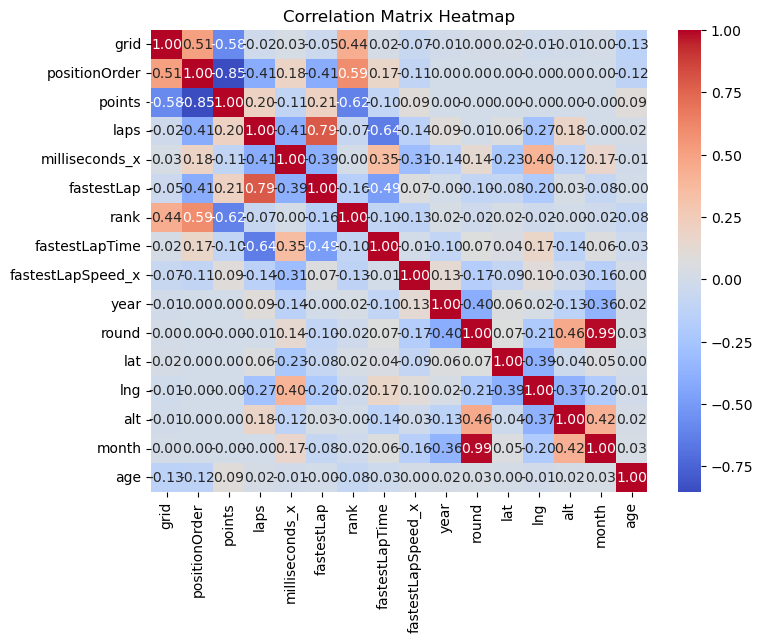

In [86]:
# Calculating correlation matrix
corr_matrix = data2223.corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
def vif(X):
    '''
    Calculate Variance Inflation Factor (VIF) for each feature to detect multicollinearity.

    Parameters:
    -----------
    X : pandas.DataFrame or array-like
        The feature matrix.

    Returns:
    --------
    None

    Notes:
    ------
    - Calculates VIF for each feature in the given feature matrix.
    - Identifies variables with moderate and high multicollinearity based on a threshold.
    - Prints the variables with moderate and high multicollinearity.
    '''
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Features"] = X.columns
    vif_data["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Set the threshold for high multicollinearity
    threshold = 5

    # Print variables with moderate multicollinearity
    moderate_multicollinearity = vif_data[vif_data["VIF Factor"] <= threshold].sort_values(by='VIF Factor', ascending=True)
    print("Variables with Moderate Multicollinearity:")
    print(moderate_multicollinearity)

    # Print variables with high multicollinearity
    print("\nVariables with High Multicollinearity (discard):")
    print(vif_data[vif_data["VIF Factor"] > threshold].sort_values(by='VIF Factor', ascending=True))


In [89]:
vif(X)

c:\Users\Afonso Cadete\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Variables with Moderate Multicollinearity:
                    Features  VIF Factor
63         status_Front wing    1.080516
58     status_Cooling system    1.095748
79         status_Vibrations    1.097777
53            status_+6 Laps    1.109649
76         status_Suspension    1.109829
71        status_Overheating    1.116756
69         status_Mechanical    1.123590
82         status_Water pump    1.124151
66          status_Fuel pump    1.132908
74            status_Retired    1.139172
55             status_Brakes    1.150316
77              status_Turbo    1.154978
64          status_Fuel leak    1.157010
59       status_Differential    1.157891
70           status_Oil leak    1.178304
83           status_Withdrew    1.210665
78          status_Undertray    1.213843
52            status_+2 Laps    1.228058
65      status_Fuel pressure    1.230804
60         status_Electrical    1.240347
81     status_Water pressure    1.248315
72         status_Power Unit    1.257315
68         sta

In [ ]:
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


# Modeling

In [90]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=21)

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
rf = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=21)

In [116]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=21)

In [117]:
from sklearn.metrics import mean_squared_error

In [118]:
rf_train_pred = rf.predict(X_train)
rf_train_mse = mean_squared_error(y_train, rf_train_pred)

print(f'Random Forest MSE: {rf_train_mse}')


rf_train_pred = rf.predict(X_val)
rf_val_mse = mean_squared_error(y_val, rf_train_pred)

print(f'Random Forest MSE: {rf_val_mse}')

Random Forest MSE: 1.254276354617152
Random Forest MSE: 2.339767737253998
